In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv
from collections import defaultdict

('tiled_st_8_1_1', 1282.5444806710525)
('tiled_st_8_2_1', 2107.18790875)
('tiled_st_16_1_1', 2430.7876400000005)
('tiled_st_8_1_2', 2498.8957840921053)
('tiled_st_8_3_1', 2684.0204649605266)
('tiled_st_8_4_1', 3085.899763144737)
('tiled_st_8_5_1', 3490.1272697368418)
('tiled_st_8_1_3', 3620.228973618421)
('tiled_st_8_6_1', 3713.8940947894735)
('tiled_st_16_2_1', 3931.9098945789483)
('tiled_st_8_7_1', 3967.770687381579)
('tiled_st_8_2_2', 4073.621927815789)
('tiled_st_8_8_1', 4174.408782)
('tiled_st_16_1_2', 4568.0274273026325)
('tiled_st_8_1_4', 4625.637392486841)
('tiled_st_16_3_1', 4999.523075407894)
('tiled_st_8_3_2', 5140.905584513159)
('tiled_st_8_1_5', 5484.21385763158)
('tiled_st_8_1_7', 5622.558500368422)
('tiled_st_8_1_6', 5655.9601510263155)
('tiled_st_16_4_1', 5724.814849381579)
('tiled_st_8_1_8', 5727.721635249999)
('tiled_st_8_2_3', 5782.463028394737)
('tiled_st_8_4_2', 5971.672015578947)
('tiled_st_16_5_1', 6355.064143618421)
('tiled_st_16_1_3', 6482.053662907894)
('tiled

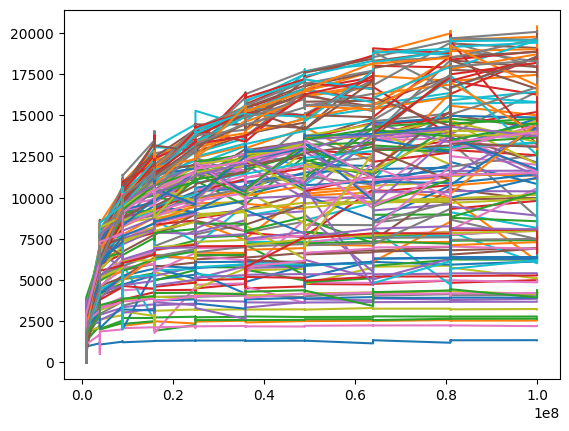

In [11]:
with open('a_complete_result.txt', newline='') as f:
    reader = csv.reader(f)
    next(reader)
    all_cases = defaultdict(lambda : [])
    for row in reader:
        # print(row)
        all_cases[row[0]].append([int(row[2]) * int(row[3]), float(row[8])])
vectors = dict()
for k, v in all_cases.items():
    vectors[k] = np.array(v)

means = []
maxs = []
for k, v in vectors.items():
    xs, ys = v.T
    # print(xs)
    # print(ys)
    mean = np.mean(ys)
    max_ = np.max(ys)
    plt.plot(xs[:xs.size // 2], ys[:ys.size // 2], label=k)
    # print(f"{k}: {mean}")
    means.append((k, mean))
    maxs.append((k, max_))

means.sort(key=lambda p: p[1])
print(*means, sep='\n')
maxs.sort(key=lambda p: p[1])
#print(*maxs, sep = '\n')
# plt.legend()

In [78]:
def plot_speed(fname):
    with open(fname, newline='') as f:
        reader = csv.reader(f)
        next(reader)
        all_cases = defaultdict(lambda : [])
        for row in reader:
            all_cases[row[0]].append([int(row[2]) * int(row[3]), float(row[6])])
    vectors = dict()
    for k, v in all_cases.items():
        vectors[k] = np.array(v)

    means = []
    maxs = []
    for k, v in vectors.items():
        xs, ys = v.T
        xs_uq, xs_inverse = np.unique(xs, return_inverse=True)
        ys_uq = np.bincount(xs_inverse, weights=ys) / np.bincount(xs_inverse)
        mean = np.mean(xs / (ys * 1000))
        max_ = np.max(xs / (ys * 1000))
        means.append((k, mean))
        maxs.append((k, max_))
        #print(xs_uq)
        #print(ys_uq)
        plt.plot(xs_uq, xs_uq/(ys_uq * 1000), label=k)
        #plt.plot(xs, ys, label=k)
        
    means.sort(key=lambda p: p[1])
    print(*list(means)[-10:], sep='\n')
    print("-----")
    maxs.sort(key=lambda p: p[1])
    print(*list(maxs)[-10:], sep = '\n')
    # plt.legend()
    #plt.legend()
    #plt.savefig("speeds.png", dpi=900)

/tmp/ipykernel_3982010/1067720056.py:18: RuntimeWarning: invalid value encountered in true_divide
  mean = np.mean(xs / (ys * 1000))
/tmp/ipykernel_3982010/1067720056.py:19: RuntimeWarning: invalid value encountered in true_divide
  max_ = np.max(xs / (ys * 1000))


('tiled_st_16_7_4', 18979.89108983839)
('tiled_st_16_5_7', 19020.491225576185)
('tiled_st_16_7_5', 19030.459557685546)
('tiled_st_16_7_6', 19077.96949526417)
('tiled_st_16_6_6', 19243.614144454114)
('tiled_st_16_4_5', 19263.827243051837)
('tiled_st_16_6_5', 19315.920000369417)
('tiled_st_16_5_6', 19403.18967445462)
('tiled_st_16_5_5', 19411.91517924767)
('tiled_st_16_4_6', 19422.4904547722)
-----
('tiled_st_16_6_8', 26278.879533945386)
('tiled_st_16_4_8', 26400.377587898358)
('tiled_st_16_7_5', 26431.79500497859)
('tiled_st_16_6_7', 26447.841708531098)
('tiled_st_16_5_5', 26513.075782345717)
('tiled_st_16_5_6', 26521.389017470432)
('tiled_st_16_6_5', 26555.815751798807)
('tiled_st_16_4_6', 26568.166947984744)
('tiled_st_16_5_7', 26627.023039850217)
('tiled_st_16_4_7', 26644.268376268188)


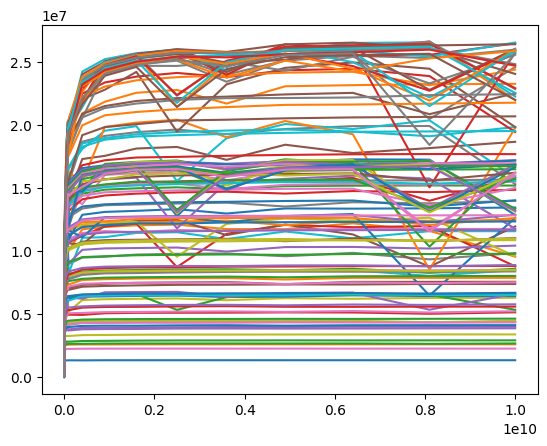

In [71]:
plot_speed("a_complete_result2.txt")

('tiled_mt_16_4_6_512', 39748.1242988348)
('tiled_mt_16_4_6_4', 53549.27461136829)
('tiled_mt_16_4_6_256', 55426.26376013151)
('tiled_mt_16_4_6_8', 70718.66881637773)
('tiled_mt_16_4_6_128', 70767.2067171318)
('tiled_mt_16_4_6_64', 81676.6193491579)
('tiled_mt_16_4_6_32', 91740.24643831146)
('tiled_mt_16_4_6_16', 94464.24269962085)
-----
('tiled_mt_16_4_6_512', 59138.88615600977)
('tiled_mt_16_4_6_4', 59792.459054095365)
('tiled_mt_16_4_6_256', 76780.56982300634)
('tiled_mt_16_4_6_8', 80810.66971207589)
('tiled_mt_16_4_6_128', 95999.00553563729)
('tiled_mt_16_4_6_64', 108057.35380532464)
('tiled_mt_16_4_6_32', 115444.44026217698)
('tiled_mt_16_4_6_16', 121251.90462828543)


/tmp/ipykernel_3982010/1067720056.py:18: RuntimeWarning: invalid value encountered in true_divide
  mean = np.mean(xs / (ys * 1000))
/tmp/ipykernel_3982010/1067720056.py:19: RuntimeWarning: invalid value encountered in true_divide
  max_ = np.max(xs / (ys * 1000))


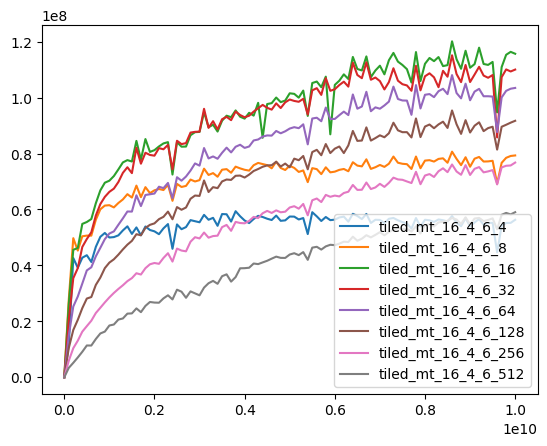

In [73]:
plot_speed("an_mt_result.txt")
plt.legend()

('tiled_mt_16_4_6_4', 1025.0007858345598)
('tiled_mt_16_4_6_8', 1995.121604344977)
('tiled_mt_16_4_6_16', 3720.657025588853)
('tiled_mt_16_4_6_32', 6720.993942839996)
('tiled_mt_16_4_6_64', 10906.466711833473)
('tiled_mt_16_4_6_512', 13738.535199574228)
('tiled_mt_16_4_6_256', 13891.709100362079)
('tiled_mt_16_4_6_128', 16033.478962666291)
-----
('tiled_mt_16_4_6_4', 1074.4764685783848)
('tiled_mt_16_4_6_8', 2127.2136877553926)
('tiled_mt_16_4_6_16', 4106.033664216145)
('tiled_mt_16_4_6_32', 7938.748756890836)
('tiled_mt_16_4_6_64', 14303.204506877884)
('tiled_mt_16_4_6_256', 19620.26302232737)
('tiled_mt_16_4_6_512', 20291.194518068267)
('tiled_mt_16_4_6_128', 23589.051648782955)


/tmp/ipykernel_3982010/2135913781.py:18: RuntimeWarning: invalid value encountered in true_divide
  mean = np.mean(xs / (ys * 1000))
/tmp/ipykernel_3982010/2135913781.py:19: RuntimeWarning: invalid value encountered in true_divide
  max_ = np.max(xs / (ys * 1000))


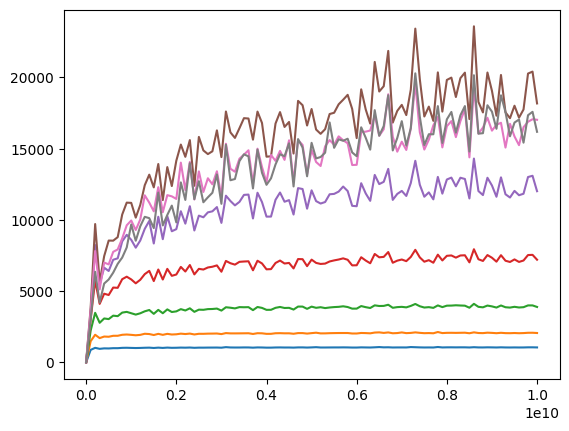

In [79]:
plot_speed("an_mt_result_gpu.txt")
#plot_speed("an_mt_result.txt")
#plt.legend()